In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

from scipy.stats import skew, norm

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
dtrain = pd.read_csv('C:\\Users\\user\\Desktop\\Jupyter\\CUAI\\3월_IMC\\Adv_IMC_train.csv')
dtest = pd.read_csv('C:\\Users\\user\\Desktop\\Jupyter\\CUAI\\3월_IMC\\Adv_IMC_test.csv')

# Let's take a look into the Data

In [3]:
dtrain.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,price
0,HP,250 G6,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,4GB,500GB HDD,Intel HD Graphics 620,No OS,1.86kg,393.9
1,Asus,X541NA (N3350/4GB/1TB/FHD/W10),Notebook,NaN,Full HD 1920x1080,Intel Celeron Dual Core N3350 1.1GHz,4GB,1TB HDD,Intel HD Graphics 500,Windows 10,2kg,344.0
2,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.0
3,Dell,Inspiron 7559,Gaming,15.6,IPS Panel Touchscreen / 4K Ultra HD 3840x2160,Intel Core i7 6700HQ 2.6GHz,16GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.72kg,1099.0
4,Razer,Blade Stealth,Ultrabook,12.5,IPS Panel 4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 620,Windows 10,1.29kg,1799.0


### TypeName
We can see 'TypeName' has the same values in the train and test data

In [4]:
print(dtrain['TypeName'].unique().tolist())
print(dtest['TypeName'].unique().tolist())

['Notebook', 'Gaming', 'Ultrabook', '2 in 1 Convertible', 'Netbook', 'Workstation']
['Notebook', 'Ultrabook', '2 in 1 Convertible', 'Gaming', 'Workstation', 'Netbook']


### Inches
We can use the 'Inches' feature by deleting the NaN values and changing the rest into floats.

### ScreenResolution
In the 'ScreenResolution' column we can see that every value has a (number)x(number) at the end so he can take this value and store it in another column. Also we can find that there are a few words that repeatedly shows up in the values.

For example) 'Full HD', 'Touchscreen', 'Quad HD+' etc.
I believe that these words have meaning when it comes to predicting the prices of the laptops so we will process them into individual columns as well.

In [5]:
dtrain['ScreenResolution'].unique().tolist()

['1366x768',
 'Full HD 1920x1080',
 'IPS Panel Touchscreen / 4K Ultra HD 3840x2160',
 'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
 'Touchscreen 2400x1600',
 'IPS Panel Full HD 1920x1080',
 'Full HD / Touchscreen 1920x1080',
 'IPS Panel Retina Display 2304x1440',
 'IPS Panel Quad HD+ / Touchscreen 3200x1800',
 'Touchscreen 1366x768',
 'IPS Panel Full HD / Touchscreen 1920x1080',
 '1600x900',
 'IPS Panel Quad HD+ 2560x1440',
 '2560x1440',
 '4K Ultra HD 3840x2160',
 'IPS Panel Full HD 1366x768',
 'Touchscreen 2256x1504',
 'Touchscreen 2560x1440',
 'IPS Panel 4K Ultra HD 3840x2160',
 'IPS Panel Retina Display 2880x1800',
 'Quad HD+ / Touchscreen 3200x1800',
 'IPS Panel 1366x768',
 'IPS Panel 2560x1440',
 'IPS Panel Retina Display 2560x1600',
 'IPS Panel Touchscreen 1920x1200',
 'Touchscreen / Quad HD+ 3200x1800',
 '1440x900',
 '4K Ultra HD / Touchscreen 3840x2160',
 'Touchscreen / 4K Ultra HD 3840x2160',
 'IPS Panel Retina Display 2736x1824',
 'Touchscreen / Full HD 1920x1080',
 'IPS 

### Cpu
We can see that the Cpu feature contains Intel and AMD Cpu's. Which we will have to convert into individual features

In [6]:
dtrain['Cpu'].unique().tolist()

['Intel Core i5 7200U 2.5GHz',
 'Intel Celeron Dual Core N3350 1.1GHz',
 'Intel Core i7 6500U 2.5GHz',
 'Intel Core i7 6700HQ 2.6GHz',
 'Intel Core i7 7500U 2.5GHz',
 'Intel Core i5 7300U 2.6GHz',
 'Intel Core i5 7Y57 1.2GHz',
 'Intel Core i7 8550U 1.8GHz',
 'Intel Core i7 7700HQ 2.8GHz',
 'Intel Core i7 6820HK 2.7GHz',
 'Intel Core i5 6200U 2.3GHz',
 'Intel Core M 1.2GHz',
 'Intel Core i7 7500U 2.7GHz',
 'Intel Core i3 7100U 2.4GHz',
 'Intel Celeron Dual Core N3060 1.6GHz',
 'AMD Ryzen 1600 3.2GHz',
 'Intel Core i3 6006U 2GHz',
 'AMD A4-Series 7210 2.2GHz',
 'Intel Core i7 7820HQ 2.9GHz',
 'Intel Core i5 8250U 1.6GHz',
 'Intel Celeron Quad Core N3450 1.1GHz',
 'Intel Celeron Dual Core 3205U 1.5GHz',
 'Intel Core i5 1.6GHz',
 'Intel Core i7 6500U 2.50GHz',
 'Intel Core i5 7300HQ 2.5GHz',
 'Intel Celeron Dual Core N3050 1.6GHz',
 'Intel Atom X5-Z8350 1.44GHz',
 'AMD A6-Series 9220 2.5GHz',
 'Intel Atom x5-Z8350 1.44GHz',
 'Intel Core M 6Y75 1.2GHz',
 'Intel Core i7 7600U 2.8GHz',
 'Inte

### Ram
Ram can easily be processed by just deleting the 'GB'

In [7]:
dtrain['Ram'].unique().tolist()

['4GB', '6GB', '16GB', '8GB', '64GB', '12GB', '32GB', '2GB', '24GB']

### Memory
We can do the same stuff we did with the ScreenResolution column to the Memory column but just a little differently.

In [8]:
dtrain['Memory'].unique().tolist()

['500GB HDD',
 '1TB HDD',
 '128GB SSD +  1TB HDD',
 '512GB SSD',
 '256GB SSD',
 '512GB SSD +  1TB HDD',
 '1TB SSD',
 '128GB SSD',
 '256GB SSD +  1TB HDD',
 '512GB Flash Storage',
 '128GB HDD',
 '180GB SSD',
 '256GB SSD +  1.0TB Hybrid',
 '2TB HDD',
 '32GB Flash Storage',
 '16GB SSD',
 '256GB Flash Storage',
 '512GB SSD +  512GB SSD',
 '128GB SSD +  2TB HDD',
 '16GB Flash Storage',
 '256GB SSD +  2TB HDD',
 '1TB SSD +  1TB HDD',
 '1.0TB Hybrid',
 '64GB Flash Storage',
 '128GB Flash Storage',
 '32GB SSD',
 '512GB SSD +  2TB HDD',
 '8GB SSD',
 '1.0TB HDD',
 '256GB SSD +  500GB HDD',
 '512GB SSD +  256GB SSD',
 '256GB SSD +  256GB SSD',
 '240GB SSD',
 '508GB Hybrid',
 '1TB HDD +  1TB HDD',
 '64GB SSD']

### Gpu
basically the same thing as the Cpu

In [9]:
dtrain['Gpu'].unique().tolist()

['Intel HD Graphics 620',
 'Intel HD Graphics 500',
 'AMD Radeon R5 M330',
 'Nvidia GeForce GTX 960M',
 'Intel HD Graphics 615',
 'Intel UHD Graphics 620',
 'Nvidia GeForce GTX 1070',
 'Nvidia GeForce GTX 980 ',
 'Intel HD Graphics 520',
 'AMD Radeon R5 M315',
 'Intel HD Graphics 515',
 'Nvidia GeForce GTX 1060',
 'AMD Radeon R5 M420',
 'AMD Radeon R5 M430',
 'Nvidia GeForce GTX 980M',
 'Intel HD Graphics 400',
 'AMD Radeon RX 580',
 'AMD Radeon R7 M445',
 'AMD Radeon R3',
 'Nvidia Quadro M2200M',
 'AMD R17M-M1-70',
 'Nvidia GeForce 930MX',
 'Nvidia GeForce GTX 970M',
 'Nvidia Quadro M520M',
 'Intel HD Graphics',
 'Intel HD Graphics 6000',
 'Nvidia GeForce 920MX',
 'Nvidia GeForce 940MX',
 'Nvidia GeForce GTX 1050',
 'Nvidia Quadro M1200',
 'Intel HD Graphics 620 ',
 'AMD R4 Graphics',
 'AMD Radeon 520',
 'AMD Radeon 530',
 'Nvidia GeForce GTX 1050 Ti',
 'AMD Radeon RX 550',
 'Nvidia GeForce 930M',
 'Intel Iris Plus Graphics 640',
 'Nvidia GeForce 930MX ',
 'Nvidia GeForce GTX 950M',
 

### OpSys
We can see that the values for the train data and the test data are different. So I got rid of the Android value because I considered it as noise(I also didn't want to waste a column just for the 'android' value) and dropped it. Then I put the Windows OS'/Mac OS' into 1 column with different integer values(ex: Windows7 = 1, Windows10 = 2 etc.)

In [10]:
dtrain.OpSys.unique().tolist()

['No OS',
 'Windows 10',
 'Chrome OS',
 'Windows 7',
 'Mac OS X',
 'Linux',
 'Windows 10 S',
 'macOS',
 'Android']

In [11]:
dtest.OpSys.unique().tolist()

['Windows 10',
 'No OS',
 'Linux',
 'Chrome OS',
 'Windows 10 S',
 'macOS',
 'Windows 7']

### Weight
The Weight column can also be used by just deleting the 'Kg' and then changing it into a float just like what we did with the 'Ram'

In [12]:
dtrain.Weight.head()

0    1.86kg
1       2kg
2    2.19kg
3    2.72kg
4    1.29kg
Name: Weight, dtype: object

# Drop noise
row 889 - has Samsung Cortex for Cpu and ARM Mali for Gpu(which is not in the test set and has nothing in common with the other index's)

row 16, 287, 314, 920, 956 = Intel Core M without further info / 889 has Samsung Cortex for Cpu and ARM Mali for Gpu(which is not in the test set and has nothing in common with the other index's)

row 219 contains 'Intel Iris Pro Graphics' which doesn't contain any information about its serial number nor generation.

row 268 & 712 contains 'Android' in OpSys which doesn't exist in the test set and there are only 2 rows containing 'Android' so I assumed the two rows as noise and dropped them

In [13]:
np.where(dtrain.values == 'Android')

(array([268, 712], dtype=int64), array([9, 9], dtype=int64))

In [14]:
#np.where(dtrain.values == 'Intel Iris Pro Graphics')
#np.where(dtrain.values == 'Android')
#dtrain.Gpu[219]
#dtrain.OpSys[268]
#dtrain.OpSys[712]
dtrain.drop(dtrain.index[[16, 219, 268, 287, 314, 712, 889, 920, 956]], inplace=True)

# Drop duplicates

In [15]:
#dtrain.duplicated().sum()
#dtrain.loc[dtrain.duplicated(keep='last'),:] # keep = first / last / False
dtrain.drop_duplicates(keep='first', inplace=True)

# Drop NaN in Inches

In [16]:
dtrain = dtrain.dropna()

# Reset index

In [17]:
dtrain.reset_index(drop=True, inplace=True) # reset the index to 0~

# Skewed Data

In [18]:
#skewness and kurtosis
print("Skewness: %f" % dtrain['price'].skew())
print("Kurtosis: %f" % dtrain['price'].kurt())

Skewness: 1.282906
Kurtosis: 2.516151


In [19]:
from sklearn.preprocessing import StandardScaler
#standardizing data

price_scaled = StandardScaler().fit_transform(dtrain['price'][:,np.newaxis]);
low_range = price_scaled[price_scaled[:,0].argsort()][:10]
high_range= price_scaled[price_scaled[:,0].argsort()][-10:]

print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.38226695]
 [-1.35664461]
 [-1.3507758 ]
 [-1.34648155]
 [-1.34089903]
 [-1.33216739]
 [-1.32959085]
 [-1.31069616]
 [-1.30353908]
 [-1.30353908]]

outer range (high) of the distribution:
[[2.88335265]
 [3.09090797]
 [3.37719116]
 [3.50573232]
 [3.60679029]
 [3.93687481]
 [4.02190092]
 [4.05854517]
 [4.65115138]
 [6.24002312]]


In [20]:
dtrain['price'] = np.log1p(dtrain['price'])

In [21]:
dtrain['price']

0      5.978633
1      6.639876
2      7.003065
3      7.495542
4      7.155186
         ...   
994    6.908755
995    6.684612
996    6.445720
997    6.747187
998    6.173786
Name: price, Length: 999, dtype: float64

# Combine train and test features

In [22]:
train_labels = dtrain['price'].reset_index(drop=True)
train = dtrain.drop(['price'], axis=1)
test = dtest
features = pd.concat([train, test]).reset_index(drop=True)
features.shape

(1260, 11)

# Preprocessing 'Cpu' Column

In [23]:
def CPU_transform(data):
    
    # Extract GHz from Cpu
    data['Cpu'] = data["Cpu"].str.replace(" ", "+")
    data['GHz'] = data["Cpu"].str.replace(r".+[+]", "").str.replace(r"GHz", "").astype(float)
    #-------------------------------------------------------------------------------------------
    # Intel Xeon E3
    data['Cpu_Xeon'] = data["Cpu"].str.replace(r"Intel[+]Xeon[+]E3[-]", "").str.replace(r"[+].+", "").str.replace(r"\D", "")
    data['Cpu_Xeon'] = data['Cpu_Xeon'].replace(r'^\s*$', np.nan, regex=True).fillna(0).astype(int)
    
    # Intel Core M - 가격 / 출시 날짜를 고려하여 인코딩
    data['Cpu_CoreM'] = data["Cpu"].str.replace(r"Intel[+]Core[+]M[+]", "").str.replace(r"M\d[-]", "").str.replace(r"6Y30", "1").str.replace(r"6Y54", "1").str.replace(r"6Y75", "2").str.replace(r"7Y30", "3")
    data['Cpu_CoreM'] = data["Cpu_CoreM"].str.replace(r"[+].+", "").str.replace(r"\D", "").replace(r'^\s*$', np.nan, regex=True).fillna(0).astype(int)
    
    # Intel Pentium Dual / Quad Core
    data['Cpu_Pentium2'] = data["Cpu"].str.replace(r"Intel[+]Pentium[+]Dual[+]Core[+]", "").str.replace(r"[+].+", "").str.replace(r"\D", "").replace(r'^\s*$', np.nan, regex=True).fillna(0).astype(int)
    data['Cpu_Pentium4'] = data["Cpu"].str.replace(r"Intel[+]Pentium[+]Quad[+]Core[+]", "").str.replace(r"[+].+", "").str.replace(r"\D", "").replace(r'^\s*$', np.nan, regex=True).fillna(0).astype(int)

    # Intel Atom
    data['Cpu_Atom'] = data["Cpu"].str.replace(r"Intel[+]Atom[+]\D\d[-]", "").str.replace(r"[+].+", "").str.replace(r"\D", "").replace(r'^\s*$', np.nan, regex=True).fillna(0).astype(int)

    # Intel Celeron Dual / Quad Core
    data['Cpu_Celeron2'] = data["Cpu"].str.replace(r"Intel[+]Celeron[+]Dual[+]Core[+]", "").str.replace(r"[+].+", "").str.replace(r"\D", "").replace(r'^\s*$', np.nan, regex=True).fillna(0).astype(int)
    data['Cpu_Celeron4'] = data["Cpu"].str.replace(r"Intel[+]Celeron[+]Quad[+]Core[+]", "").str.replace(r"[+].+", "").str.replace(r"\D", "").replace(r'^\s*$', np.nan, regex=True).fillna(0).astype(int)

    # Intel Core i-series
    data['Cpu_i3'] = data["Cpu"].str.replace(r"Intel[+]Core[+]i3[+]", "").str.replace(r"[+].+", "").str.replace(r"\D", "").replace(r'^\s*$', np.nan, regex=True).fillna(0).astype(int)
    data['Cpu_i5'] = data["Cpu"].str.replace(r"Intel[+]Core[+]i5[+]", "").str.replace(r"[+].+", "").str.replace(r"\D", "").replace(r'^\s*$', np.nan, regex=True).fillna(0).astype(int)
    data['Cpu_i7'] = data["Cpu"].str.replace(r"Intel[+]Core[+]i7[+]", "").str.replace(r"[+].+", "").str.replace(r"\D", "").replace(r'^\s*$', np.nan, regex=True).fillna(0).astype(int)

    # AMD_A Series
    data['Cpu_AMD_A'] = data["Cpu"].str.replace(r"AMD[+]A", "").str.replace(r"[-].+[+].+[-]", "").str.replace(r"[-]\D+[+]", "").str.replace(r"[+].+", "").str.replace(r"\D", "").replace(r'^\s*$', np.nan, regex=True).fillna(0).astype(int)

    # AMD Ryzen
    data['Cpu_AMD_Ryzen'] = data["Cpu"].str.replace(r"AMD[+]Ryzen[+]", "").str.replace(r"[+].+", "").str.replace(r"\D", "").replace(r'^\s*$', np.nan, regex=True).fillna(0).astype(int)

    # AMD FX
    data['Cpu_AMD_FX'] = data["Cpu"].str.replace(r"AMD[+]FX[+]", "").str.replace(r"[+].+", "").str.replace(r"\D", "").replace(r'^\s*$', np.nan, regex=True).fillna(0).astype(int)

    # AMD E-Series
    data['Cpu_AMD_E'] = data["Cpu"].str.replace(r"AMD[+]E[-]\D+", "").str.replace(r".+[-]", "").str.replace(r"[+].+", "").str.replace(r"\D", "").replace(r'^\s*$', np.nan, regex=True).fillna(0).astype(int)
    
    return data

In [24]:
features = CPU_transform(features)

# Preprocessing 'Gpu' Column

In [25]:
def GPU_transform(data):
    
    # AMD R17M-M1-70 is the same as AMD Radeon R7 M530
    data['Gpu'] = data["Gpu"].str.replace("AMD R17M-M1-70", "AMD Radeon R7 M530")
    data['Gpu'] = data["Gpu"].str.replace(" ", "+")
    
    # Intel HD Graphics
    # 참고문헌 - https://en.wikipedia.org/wiki/List_of_Intel_graphics_processing_units
    for a in data[(data['Gpu'] == 'Intel+HD+Graphics') & ((data['Cpu'] == 'Intel+Atom+x5-Z8350+1.44GHz') | (data['Cpu'] == 'Intel+Atom+X5-Z8350+1.44GHz') | (data['Cpu'] == 'Intel+Celeron+Dual+Core+N3060+1.6GHz'))].index:
        data['Gpu'][a] = data['Gpu'][a].replace('Intel+HD+Graphics', 'Intel+HD+Graphics+400')
    for b in data[(data['Gpu'] == 'Intel+HD+Graphics') & (data['Cpu'] == 'Intel+Pentium+Quad+Core+N3710+1.6GHz')].index:
        data['Gpu'][b] = data['Gpu'][b].replace('Intel+HD+Graphics', 'Intel+HD+Graphics+405')
    for c in data[(data['Gpu'] == 'Intel+HD+Graphics') & ((data['Cpu'] == 'Intel+Core+i5+7200U+2.5GHz') | (data['Cpu'] == 'Intel+Core+i7+7600U+2.8GHz'))].index:
        data['Gpu'][c] = data['Gpu'][c].replace('Intel+HD+Graphics', 'Intel+HD+Graphics+620')
    # 남아 있는 Intel HD Graphics들은 전부 8세대이므로 묶어줍니다.
    data['Gpu_HDG_default'] = data["Gpu"].str.replace(r"Intel[+]HD[+]Graphics", "").replace(r'^\s*$', 1, regex=True).str.replace(r"[+].+", "").replace(np.nan, 1, regex=True).str.replace(r"\D", "").replace(np.nan, 1, regex=True).replace(r'^\s*$', np.nan, regex=True).fillna(0).astype(int)
    data['Gpu_Intel_HD'] = data["Gpu"].str.replace(r"Intel[+]HD[+]Graphics[+]", "").str.replace(r"[+].+", "").str.replace(r"\D", "").replace(r'^\s*$', np.nan, regex=True).fillna(0).astype(int)
    
    # Intel UHD Graphics
    data['Gpu_Intel_UHD'] = data["Gpu"].str.replace(r"Intel[+]UHD[+]\D+[+]", "").str.replace(r"[+].+", "").str.replace(r"\D", "").replace(r'^\s*$', np.nan, regex=True).fillna(0).astype(int)
    
    # Intel Iris (default)/Plus
    data['Gpu_Intel_Iris'] = data["Gpu"].str.replace(r"Intel[+]Iris[+]Plus[+]\D+", "").str.replace(r"Intel[+]Iris[+]\D+", "").str.replace(r"[+].+", "").str.replace(r"\D", "").replace(r'^\s*$', np.nan, regex=True).fillna(0).astype(int)
    
    # Nvidia Geforce GTX_Ti
    data['Gpu_Nvidia_GTX_Ti'] = data["Gpu"].str.replace(r"Nvidia[+]GeForce[+]GTX.+Ti", "1").str.replace(r"[+].+", "").str.replace(r"\D", "").replace(r'^\s*$', np.nan, regex=True).fillna(0).astype(int)
    
    # Nvidia GeForce GTX_M
    # Ti들을 미리 삭제
    data['Gpu_Nvidia_GTX_M'] = data["Gpu"].str.replace(r"Nvidia[+]GeForce[+]GTX.+Ti", "0") # Ti들을 미리 삭제
    data['Gpu_Nvidia_GTX_M'] = data["Gpu_Nvidia_GTX_M"].str.replace(r"Nvidia[+]GeForce[+]GTX.+MX", "")
    data['Gpu_Nvidia_GTX_M'] = data["Gpu_Nvidia_GTX_M"].str.replace(r"Nvidia[+]GeForce[+]GTX[+]", "")

    data['Gpu_Nvidia_GTX_M'] = data["Gpu_Nvidia_GTX_M"].str.replace(r"[+].+", "")
    data['Gpu_Nvidia_GTX_M'] = data["Gpu_Nvidia_GTX_M"].str.replace(r"[^\d+M]", '')
    data['Gpu_Nvidia_GTX_M1'] = data['Gpu_Nvidia_GTX_M'].str.split('M')

    for i in range(len(data['Gpu_Nvidia_GTX_M'])):
        if len(data['Gpu_Nvidia_GTX_M'].str.split('M')[i]) == 2:
            data['Gpu_Nvidia_GTX_M1'][i] = data['Gpu_Nvidia_GTX_M'].str.split('M')[i][0]

    data['Gpu_Nvidia_GTX_M'] = data['Gpu_Nvidia_GTX_M1'].str.replace(r"[.+]", '')
    data['Gpu_Nvidia_GTX_M'] = data['Gpu_Nvidia_GTX_M'].replace(r'^\s*$', np.nan, regex=True)
    data['Gpu_Nvidia_GTX_M'] = data['Gpu_Nvidia_GTX_M'].fillna(0)
    data['Gpu_Nvidia_GTX_M'] = data['Gpu_Nvidia_GTX_M'].astype(int)
    
    # Nvidia GeForce GTX_MX
    # Ti들을 미리 삭제
    data['Gpu_Nvidia_GTX_MX'] = data["Gpu"].str.replace(r"Nvidia[+]GeForce[+]GTX.+Ti", "0") # Ti들을 미리 삭제
    data['Gpu_Nvidia_GTX_MX'] = data["Gpu_Nvidia_GTX_MX"].str.replace(r"Nvidia[+]GeForce[+]GTX[+]", "")

    data['Gpu_Nvidia_GTX_MX'] = data["Gpu_Nvidia_GTX_MX"].str.replace(r"[+].+", "")
    data['Gpu_Nvidia_GTX_MX'] = data["Gpu_Nvidia_GTX_MX"].str.replace(r"[^\d+MX]", '')
    data['Gpu_Nvidia_GTX_MX1'] = data['Gpu_Nvidia_GTX_MX'].str.split('MX')

    for i in range(len(data['Gpu_Nvidia_GTX_MX'])):
        if len(data['Gpu_Nvidia_GTX_MX'].str.split('MX')[i]) == 2:
            data['Gpu_Nvidia_GTX_MX1'][i] = data['Gpu_Nvidia_GTX_MX'].str.split('M')[i][0]

    data['Gpu_Nvidia_GTX_MX'] = data['Gpu_Nvidia_GTX_MX1'].str.replace(r"[.+]", '')
    data['Gpu_Nvidia_GTX_MX'] = data['Gpu_Nvidia_GTX_MX'].replace(r'^\s*$', np.nan, regex=True)
    data['Gpu_Nvidia_GTX_MX'] = data['Gpu_Nvidia_GTX_MX'].fillna(0)
    data['Gpu_Nvidia_GTX_MX'] = data['Gpu_Nvidia_GTX_MX'].astype(int)
    
    # Nvidia GeForce GTX
    # Ti들을 미리 삭제
    data['Gpu_Nvidia_GTX'] = data["Gpu"].str.replace(r"Nvidia[+]GeForce[+]GTX.+Ti", "0").str.replace(r"Nvidia[+]GeForce[+]GTX.+MX?", "").str.replace(r"Nvidia[+]GeForce[+]GTX[+]?", "").str.replace(r"<.+>", "")
    # Nvidia GTX 980 SLI drop 하긴 아까운 데이터라 그냥 이렇게 처리
    data['Gpu_Nvidia_GTX'] = data["Gpu_Nvidia_GTX"].str.replace(r"Nvidia[+]GTX[+]", "").str.replace(r"[+].+", "").str.replace(r"\D+", "").replace(r'^\s*$', np.nan, regex=True).fillna(0).astype(int)
    
    # Nvidia GeForce GT
    #GTX 들을 미리 삭제
    data['Gpu_Nvidia_GT'] = data["Gpu"].str.replace(r"Nvidia[+]GeForce[+]GTX.+", "").str.replace(r"Nvidia[+]GeForce[+]GT[+]", "").str.replace(r"[+].+", "").str.replace(r"\D+", "").replace(r'^\s*$', np.nan, regex=True).fillna(0).astype(int)
    
    # Nvidia Quadro
    data['Gpu_Nvidia_Q'] = data["Gpu"].str.replace(r"Nvidia[+]Quadro[+]", "").str.replace(r"[+].+", "").str.replace(r"\D+", "").replace(r'^\s*$', np.nan, regex=True).fillna(0).astype(int)
    
    # Nvidia GeForce(M, MX, default)구분없이
    data['Gpu_Nvidia_MX'] = data["Gpu"].str.replace(r"Nvidia[+]GeForce[+]", "").str.replace(r"GT.+", "").str.replace(r"[+].+", "").str.replace(r"\D+", "").replace(r'^\s*$', np.nan, regex=True).fillna(0).astype(int)
    
    # AMD Radeon R_Series
    data['Gpu_AMD_R'] = data["Gpu"].str.replace(r"AMD[+]Radeon[+]R", "").str.replace(r"AMD[+]FirePro.+", "").str.replace(r"Intel.+", "").str.replace(r"Nvidia.+", "").str.replace(r"[+]M", ".").str.replace(r"X", "10").str.replace(r"[+]", ".").str.replace(r"AMD.Radeon.+", "").str.replace(r"Graphics", "").str.replace(r"AMD.R", "").replace(r'^\s*$', np.nan, regex=True).fillna(0).astype(float)
    
    # AMD FirePro
    data['Gpu_AMD_FP'] = data["Gpu"].str.replace(r"AMD[+]FirePro[+]", "").str.replace(r"[+].+", "").str.replace(r"\D+", "").replace(r'^\s*$', np.nan, regex=True).fillna(0).astype(int)
    
    # AMD Pro
    data['Gpu_AMD_Pro'] = data["Gpu"].str.replace(r"AMD[+]Radeon[+]Pro[+]", "").str.replace(r"[+].+", "").str.replace(r"\D+", "").replace(r'^\s*$', np.nan, regex=True).fillna(0).astype(int)
    
    # AMD Radeon 이후에 숫자
    data['Gpu_AMD_NUM'] = data["Gpu"].str.replace(r"AMD[+]Radeon[+]R.+", "").str.replace(r"AMD[+]Radeon[+]Pro.+", "").str.replace(r"AMD[+]Radeon[+]", "").str.replace(r"AMD[+]FirePro.+", "").str.replace(r"Intel.+", "").str.replace(r"Nvidia.+", "").str.replace(r"\D+", "").replace(r'^\s*$', np.nan, regex=True).fillna(0).astype(int)

    data = data.drop(['Gpu_Nvidia_GTX_M1','Gpu_Nvidia_GTX_MX1'],axis=1)
    
    return data

In [26]:
features = GPU_transform(features)

# ScreenResolution

In [27]:
def SR_transform(data):
    
    data['SR_4K'] = data['ScreenResolution'].str.findall('.*4K Ultra HD.*')
    data['SR_4K'] = data['SR_4K'].explode('SR_4K').str.replace(r'.+', '1').replace(np.nan, 0, regex=True).astype(int)

    data['SR_Touch'] = data['ScreenResolution'].str.findall('.*Touchscreen.*')
    data['SR_Touch'] = data['SR_Touch'].explode('SR_Touch').str.replace(r'.+', '1').replace(np.nan, 0, regex=True).astype(int)

    data['SR_QuadHD'] = data['ScreenResolution'].str.findall('.*Quad HD.*')
    data['SR_QuadHD'] = data['SR_QuadHD'].explode('SR_QuadHD').str.replace(r'.+', '1').replace(np.nan, 0, regex=True).astype(int)

    data['SR_Retina'] = data['ScreenResolution'].str.findall('.*Retina Display.*')
    data['SR_Retina'] = data['SR_Retina'].explode('SR_Retina').str.replace(r'.+', '1').replace(np.nan, 0, regex=True).astype(int)

    data['SR_FullHD'] = data['ScreenResolution'].str.findall('.*Full HD.*')
    data['SR_FullHD'] = data['SR_FullHD'].explode('SR_FullHD').str.replace(r'.+', '1').replace(np.nan, 0, regex=True).astype(int)
    
    return data

In [28]:
features = SR_transform(features)

In [29]:
def Memory_transform(data):
    
    data['Memory'] = data['Memory'].astype(str).replace('\.0', '', regex=True) 
    data["Memory"] = data["Memory"].str.replace('GB', '')
    data["Memory"] = data["Memory"].str.replace('TB', '000')
    SSD_HDD_FS_Hy = data["Memory"].str.split("+", n = 1, expand = True)
    data["first"]= SSD_HDD_FS_Hy[0]
    data["first"]= data["first"].str.strip()
    data["second"]= SSD_HDD_FS_Hy[1]
    data["HDD1"] = data["first"].apply(lambda data: 1 if "HDD" in data else 0)
    data["SSD1"] = data["first"].apply(lambda data: 1 if "SSD" in data else 0)
    data["Hybrid1"] = data["first"].apply(lambda data: 1 if "Hybrid" in data else 0)
    data["Flash_Storage1"] = data["first"].apply(lambda data: 1 if "Flash Storage" in data else 0)
    data['first'] = data['first'].str.replace(r'\D', '')
    data["second"].fillna("0", inplace = True)
    data["HDD2"] = data["second"].apply(lambda data: 1 if "HDD" in data else 0)
    data["SSD2"] = data["second"].apply(lambda data: 1 if "SSD" in data else 0)
    data["Hybrid2"] = data["second"].apply(lambda data: 1 if "Hybrid" in data else 0)
    data["Flash_Storage2"] = data["second"].apply(lambda data: 1 if "Flash Storage" in data else 0)
    data['second'] = data['second'].str.replace(r'\D', '')
    data["first"] = data["first"].astype(int)
    data["second"] = data["second"].astype(int)
    data['HDD'] = data["first"]*data['HDD1'] + data["second"]*data['HDD2']
    data['SSD'] = data["first"]*data['SSD1'] + data["second"]*data['SSD2']
    data['Hybrid'] = data["first"]*data['Hybrid1'] + data["second"]*data['Hybrid2']
    data['Flash_Storage'] = data["first"]*data['Flash_Storage1'] + data["second"]*data['Flash_Storage2']
    
    return data

In [30]:
features = Memory_transform(features)

In [31]:
def SR_XY_transform(data):
    
    SR = data["ScreenResolution"].str.split("x", n = 1, expand = True)
    data["xres"]= SR[0]
    data["yres"]= SR[1]
    data["xres"] = data['xres'].str.replace(r'\D+.\d?\D+', '').astype(int)
    data["yres"] = data["yres"].astype(int)
    data["ScreenResolution"]=(data["xres"]*data["yres"]).astype(int)
    
    return data

In [32]:
features = SR_XY_transform(features)

In [33]:
def Ram_transform(data):
    
    data["Ram"] = data["Ram"].str.replace('GB', '') ## remove 'GB'
    data["Ram"] = data["Ram"].astype(int)
    
    return data

In [34]:
features = Ram_transform(features)

In [35]:
def Weight_transform(data):
    
    data["Weight"] = data["Weight"].str.replace('kg', '') ## remove 'kg'
    data["Weight"] = data["Weight"].astype(float)
    
    return data

In [36]:
features = Weight_transform(features)

In [37]:
def Drop_transform(data):
    
    data = data.drop(['Cpu', 'Gpu', 'Memory','first',
                'second','HDD1','SSD1','Hybrid1','Flash_Storage1',
                'HDD2','SSD2','Hybrid2','Flash_Storage2'],axis=1)
    
    return data

In [38]:
features = Drop_transform(features)

# Skewed data process

In [39]:
skewcolumn = ['Inches','ScreenResolution','Ram','Weight','GHz','HDD','SSD','Hybrid','Flash_Storage','xres','yres']
for i in skewcolumn:
    print('{} : {}'.format(i, features[i].skew()))

Inches : -0.3928637699786714
ScreenResolution : 8.287261093618255
Ram : 2.7142714072211556
Weight : 1.1749102414430983
GHz : -0.8602792756995731
HDD : 0.8723019420763266
SSD : 1.3859198286201797
Hybrid : 11.3889012162699
Flash_Storage : 10.229713218500967
xres : 8.339105253062645
yres : 2.1478910455470204


In [40]:
features['ScreenResolution'] = np.log1p(features['ScreenResolution'])
features['Weight'] = np.log1p(features['Weight'])
features['xres'] = np.log1p(features['xres'])
features['yres'] = np.log1p(features['yres'])

In [41]:
features

,Company,Product,TypeName,Inches,ScreenResolution,Ram,OpSys,Weight,GHz,Cpu_Xeon,...,SR_Touch,SR_QuadHD,SR_Retina,SR_FullHD,HDD,SSD,Hybrid,Flash_Storage,xres,yres
0,HP,250 G6,Notebook,15.6,13.863433,4,No OS,1.050822,2.5,0,...,0,0,0,0,500,0,0,0,7.220374,6.645091
1,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,13.863433,6,Windows 10,1.160021,2.5,0,...,0,0,0,0,1000,0,0,0,7.220374,6.645091
2,Dell,Inspiron 7559,Gaming,15.6,15.931091,16,Windows 10,1.313724,2.6,0,...,1,0,0,0,1000,128,0,0,8.253488,7.678326
3,Razer,Blade Stealth,Ultrabook,12.5,15.931091,16,Windows 10,0.828552,2.5,0,...,1,0,0,0,0,512,0,0,8.253488,7.678326
4,Dell,Latitude 5480,Notebook,14.0,14.544797,8,Windows 10,0.970779,2.6,0,...,0,0,0,1,0,256,0,0,7.560601,6.985642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,Dell,Inspiron 7378,2 in 1 Convertible,13.3,14.544797,12,Windows 10,0.955511,2.7,0,...,1,0,0,1,0,256,0,0,7.560601,6.985642
1256,HP,Probook 470,Notebook,17.3,14.544797,8,Windows 10,1.252763,1.8,0,...,0,0,0,1,0,256,0,0,7.560601,6.985642
1257,Dell,Precision 7720,Workstation,17.3,14.544797,16,Windows 10,1.486140,2.9,0,...,0,0,0,1,0,256,0,0,7.560601,6.985642
1258,Lenovo,Thinkpad T470p,Ultrabook,14.0,15.120161,8,Windows 10,0.993252,2.8,0,...,0,0,0,1,0,512,0,0,7.848153,7.273093


# One-Hot Encode

In [42]:
def one_hot_TypeName(data):
    TN = pd.get_dummies(data['TypeName'])
    return TN

In [43]:
TN = one_hot_TypeName(features)

In [44]:
def one_hot_OpSys(data):
    OS = pd.get_dummies(data['OpSys'])
    
    OS['Windows'] = OS['Windows 7'] + OS['Windows 10 S'] + OS['Windows 10']
    OS = OS.drop(['Windows 7', 'Windows 10 S', 'Windows 10'], axis=1)
    OS['MacOS'] = OS['Mac OS X']*1 + OS['macOS']*2 # macOS가 더 좋은 OS
    OS = OS.drop(['Mac OS X', 'macOS'], axis=1)
    return OS

In [45]:
OS = one_hot_OpSys(features)

In [46]:
features.Company.unique().tolist()

['HP',
 'Dell',
 'Razer',
 'Google',
 'LG',
 'MSI',
 'Asus',
 'Acer',
 'Lenovo',
 'Toshiba',
 'Apple',
 'Vero',
 'Mediacom',
 'Samsung',
 'Microsoft',
 'Chuwi',
 'Xiaomi',
 'Huawei',
 'Fujitsu']

In [47]:
def one_hot_Company(data):
    Company = pd.get_dummies(data['Company'])
    return Company

In [48]:
CP = one_hot_Company(features)

In [49]:
def one_hot_Product(data):
    Product = pd.get_dummies(data['Product'])
    return Product

In [50]:
Pr = one_hot_Product(features)

In [51]:
def input_dummy():
    for i in TN.columns:
        features[i] = TN[i]
    for i in OS.columns:
        features[i] = OS[i]
    for i in CP.columns:
        features[i] = CP[i]
    for i in Pr.columns:
        features[i] = Pr[i]

input_dummy()

In [52]:
features = features.select_dtypes(exclude=['object'])

In [53]:
features.astype(np.float64)

,Inches,ScreenResolution,Ram,Weight,GHz,Cpu_Xeon,Cpu_CoreM,Cpu_Pentium2,Cpu_Pentium4,Cpu_Atom,...,ZenBook UX430UN,ZenBook UX510UX-CN211T,ZenBook UX530UQ-PRO,Zenbook 3,Zenbook Flip,Zenbook UX330UA-AH5Q,Zenbook UX390UA,Zenbook UX410UA-GV027T,Zenbook UX430UA,Zenbook UX510UW-FI095T
0,15.6,13.863433,4.0,1.050822,2.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15.6,13.863433,6.0,1.160021,2.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,15.6,15.931091,16.0,1.313724,2.6,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,12.5,15.931091,16.0,0.828552,2.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,14.0,14.544797,8.0,0.970779,2.6,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,13.3,14.544797,12.0,0.955511,2.7,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1256,17.3,14.544797,8.0,1.252763,1.8,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1257,17.3,14.544797,16.0,1.486140,2.9,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1258,14.0,15.120161,8.0,0.993252,2.8,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
features.dtypes

Inches                    float64
ScreenResolution          float64
Ram                         int32
Weight                    float64
GHz                       float64
                           ...   
Zenbook UX330UA-AH5Q        uint8
Zenbook UX390UA             uint8
Zenbook UX410UA-GV027T      uint8
Zenbook UX430UA             uint8
Zenbook UX510UW-FI095T      uint8
Length: 686, dtype: object

In [55]:
features.columns.tolist()

['Inches',
 'ScreenResolution',
 'Ram',
 'Weight',
 'GHz',
 'Cpu_Xeon',
 'Cpu_CoreM',
 'Cpu_Pentium2',
 'Cpu_Pentium4',
 'Cpu_Atom',
 'Cpu_Celeron2',
 'Cpu_Celeron4',
 'Cpu_i3',
 'Cpu_i5',
 'Cpu_i7',
 'Cpu_AMD_A',
 'Cpu_AMD_Ryzen',
 'Cpu_AMD_FX',
 'Cpu_AMD_E',
 'Gpu_HDG_default',
 'Gpu_Intel_HD',
 'Gpu_Intel_UHD',
 'Gpu_Intel_Iris',
 'Gpu_Nvidia_GTX_Ti',
 'Gpu_Nvidia_GTX_M',
 'Gpu_Nvidia_GTX_MX',
 'Gpu_Nvidia_GTX',
 'Gpu_Nvidia_GT',
 'Gpu_Nvidia_Q',
 'Gpu_Nvidia_MX',
 'Gpu_AMD_R',
 'Gpu_AMD_FP',
 'Gpu_AMD_Pro',
 'Gpu_AMD_NUM',
 'SR_4K',
 'SR_Touch',
 'SR_QuadHD',
 'SR_Retina',
 'SR_FullHD',
 'HDD',
 'SSD',
 'Hybrid',
 'Flash_Storage',
 'xres',
 'yres',
 '2 in 1 Convertible',
 'Gaming',
 'Netbook',
 'Notebook',
 'Ultrabook',
 'Workstation',
 'Chrome OS',
 'Linux',
 'No OS',
 'Windows',
 'MacOS',
 'Acer',
 'Apple',
 'Asus',
 'Chuwi',
 'Dell',
 'Fujitsu',
 'Google',
 'HP',
 'Huawei',
 'LG',
 'Lenovo',
 'MSI',
 'Mediacom',
 'Microsoft',
 'Razer',
 'Samsung',
 'Toshiba',
 'Vero',
 'Xiaomi',

In [56]:
train = features.iloc[:len(train_labels), :]
test = features.iloc[len(train_labels):, :]
train.shape, train_labels.shape, test.shape

((999, 686), (999,), (261, 686))

# BayesianOptimizer
With the BayesianOptimizer we will kind the ideal values for the parameters in each model

In [57]:
from bayes_opt import BayesianOptimization
import xgboost as xgb
from xgboost import XGBRegressor, XGBRegressor
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

# Models
Find what each parameters mean in each model by looking into the link below every model

## LightGBM
LightGBM - https://neptune.ai/blog/lightgbm-parameters-guide

## XGB Regressor
https://xgboost.readthedocs.io/en/latest/parameter.html

In [60]:
# 탐색 대상 함수 (XGBRegressor)
def XGB_cv(max_depth, learning_rate, n_estimators, gamma
             ,min_child_weight, subsample
             ,colsample_bytree, reg_alpha, reg_lambda, objective='reg:linear', silent=True, nthread=-1):

    # 모델 정의
    model = XGBRegressor(max_depth=int(max_depth),
                           learning_rate=learning_rate,
                           n_estimators=int(n_estimators),
                           gamma=gamma,
                           min_child_weight=min_child_weight,
                           subsample=subsample,
                           colsample_bytree=colsample_bytree,
                           reg_alpha=reg_alpha,
                           reg_lambda = reg_lambda,
                           objective=objective,
                           nthread=nthread
                           )

    # metric 계산
    rmse = np.sqrt(-cross_val_score(model, train, train_labels, scoring="neg_mean_squared_error", cv=5))

    
    # 오차 최적화로 사용할 metric 반환
    return -rmse.mean()

In [61]:
# 실험해보고자하는 hyperparameter 집합
pbounds = {'max_depth': (3, 8),
            'learning_rate': (0.001, 0.1),
            'n_estimators': (1000, 10000),
            'gamma': (0, 1),
            'min_child_weight': (0, 3),
            'subsample': (0.5, 1),
            'colsample_bytree' : (0.2, 1),
            'reg_alpha' : (0,5),
            'reg_lambda' : (0,10),
            }

bo=BayesianOptimization(f=XGB_cv, pbounds=pbounds, verbose=2, random_state=42)

bo.maximize(init_points=10, n_iter=30, acq='ei', xi=0.01)

print(bo.max)

|   iter    |  target   | colsam... |   gamma   | learni... | max_depth | min_ch... | n_esti... | reg_alpha | reg_la... | subsample |
-------------------------------------------------------------------------------------------------------------------------------------
[23:30:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[23:30:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[23:30:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[23:30:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[23:30:42] WARNING: C:/U

[23:35:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[23:35:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[23:35:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[23:35:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
|  8        | -0.2492   |  0.4854   |  0.2809   |  0.05473  |  3.705    |  2.407    |  1.671e+0 |  4.934    |  7.722    |  0.5994   |
[23:35:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of

[23:40:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
|  15       | -0.2544   |  0.2731   |  0.8723   |  0.04724  |  3.31     |  2.87     |  5.457e+0 |  1.832    |  9.907    |  0.602    |
[23:40:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[23:41:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[23:41:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[23:41:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of

[23:46:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[23:46:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[23:47:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[23:47:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
|  23       | -0.2564   |  0.2187   |  0.7102   |  0.03491  |  5.937    |  1.149    |  3.997e+0 |  4.348    |  6.944    |  0.8228   |
[23:47:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of

[23:53:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


KeyboardInterrupt: 

In [ ]:
#{'target': -0.1841129313945096, 'params': {'colsample_bytree': 0.5152651581814524, 'gamma': 0.021071952664826532, 'learning_rate': 0.07603995749131016, 'max_depth': 6.809844347927643, 'min_child_weight': 2.761301161457484, 'n_estimators': 6136.355874258778, 'reg_alpha': 1.3188365258147017, 'reg_lambda': 1.4406194115140336, 'subsample': 0.7777929105084442}}

## Ridge
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [62]:
from sklearn.metrics import r2_score, mean_squared_error

# 탐색 대상 함수 (Ridge)
def Ridge_cv(alpha):

    # 모델 정의
    model = make_pipeline(RobustScaler(), Ridge(alpha=alpha))

    # metric 계산
    rmse = np.sqrt(-cross_val_score(model, train, train_labels, scoring="neg_mean_squared_error", cv=5))

    # 오차 최적화로 사용할 metric 반환
    return -rmse.mean()

In [63]:
# 실험해보고자하는 hyperparameter 집합
pbounds = {'alpha': (0.001, 10)}

bo=BayesianOptimization(f=Ridge_cv, pbounds=pbounds, verbose=2, random_state=42)
bo.maximize(init_points=20, n_iter=60, acq='ei', xi=0.01)
print(bo.max)

|   iter    |  target   |   alpha   |
-------------------------------------
|  1        | -0.2259   |  3.746    |
|  2        | -0.2351   |  9.507    |
|  3        | -0.2325   |  7.32     |
|  4        | -0.2305   |  5.987    |
|  5        | -0.2189   |  1.561    |
|  6        | -0.2189   |  1.561    |
|  7        | -0.2162   |  0.5818   |
|  8        | -0.2342   |  8.662    |
|  9        | -0.2305   |  6.012    |
|  10       | -0.2322   |  7.081    |
|  11       | -0.2203   |  0.2068   |
|  12       | -0.2353   |  9.699    |
|  13       | -0.2338   |  8.325    |
|  14       | -0.221    |  2.124    |
|  15       | -0.2199   |  1.819    |
|  16       | -0.22     |  1.835    |
|  17       | -0.224    |  3.043    |
|  18       | -0.2292   |  5.248    |
|  19       | -0.2273   |  4.32     |
|  20       | -0.2236   |  2.913    |
|  21       | -0.2169   |  1.006    |
|  22       | -0.2171   |  1.076    |
|  23       | -0.2249   |  3.357    |
|  24       | -0.2239   |  2.998    |
|  25       

In [ ]:
#{'target': -0.2162339615853202, 'params': {'alpha': 0.5817780380698264}}

## Lasso
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

In [64]:
from sklearn.metrics import r2_score, mean_squared_error

# 탐색 대상 함수 (Lasso)
def Lasso_cv(alpha):

    # 모델 정의
    model = make_pipeline(RobustScaler(), Lasso(alpha=alpha))

    # metric 계산
    rmse = np.sqrt(-cross_val_score(model, train, train_labels, scoring="neg_mean_squared_error", cv=5))

    # 오차 최적화로 사용할 metric 반환
    return -rmse.mean()

In [65]:
# 실험해보고자하는 hyperparameter 집합

pbounds = {'alpha': (1e-15, 1)}

bo=BayesianOptimization(f=Lasso_cv, pbounds=pbounds, verbose=2, random_state=42)
bo.maximize(init_points=20, n_iter=60, acq='ei', xi=0.01)
print(bo.max)

|   iter    |  target   |   alpha   |
-------------------------------------
|  1        | -0.3971   |  0.3745   |
|  2        | -0.4003   |  0.9507   |
|  3        | -0.3993   |  0.732    |
|  4        | -0.3985   |  0.5987   |
|  5        | -0.3623   |  0.156    |
|  6        | -0.3623   |  0.156    |
|  7        | -0.3082   |  0.05808  |
|  8        | -0.3999   |  0.8662   |
|  9        | -0.3986   |  0.6011   |
|  10       | -0.3992   |  0.7081   |
|  11       | -0.2751   |  0.02058  |
|  12       | -0.4004   |  0.9699   |
|  13       | -0.3997   |  0.8324   |
|  14       | -0.388    |  0.2123   |
|  15       | -0.374    |  0.1818   |
|  16       | -0.3748   |  0.1834   |
|  17       | -0.3968   |  0.3042   |
|  18       | -0.3981   |  0.5248   |
|  19       | -0.3974   |  0.4319   |
|  20       | -0.3967   |  0.2912   |
|  21       | -0.2415   |  1.163e-0 |
|  22       | -0.337    |  0.1003   |
|  23       | -0.4006   |  0.9999   |
|  24       | -0.3977   |  0.4784   |
|  25       

In [ ]:
#{'target': -0.24154720402835123, 'params': {'alpha': 1.1634755367141103e-05}}

## Elastic Net
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html

In [66]:
from sklearn.metrics import r2_score, mean_squared_error

# 탐색 대상 함수 (ElasticNet)
def ElasticNet_cv(alpha):

    # 모델 정의
    model = make_pipeline(RobustScaler(), ElasticNet(alpha=alpha))

    # metric 계산
    rmse = np.sqrt(-cross_val_score(model, train, train_labels, scoring="neg_mean_squared_error", cv=5))

    # 오차 최적화로 사용할 metric 반환
    return -rmse.mean()

In [67]:
# 실험해보고자하는 hyperparameter 집합
pbounds = {'alpha': (1e-15, 1)}

bo=BayesianOptimization(f=ElasticNet_cv, pbounds=pbounds, verbose=2, random_state=42)
bo.maximize(init_points=20, n_iter=60, acq='ei', xi=0.01)
print(bo.max)

|   iter    |  target   |   alpha   |
-------------------------------------
|  1        | -0.3787   |  0.3745   |
|  2        | -0.3977   |  0.9507   |
|  3        | -0.397    |  0.732    |
|  4        | -0.3968   |  0.5987   |
|  5        | -0.3239   |  0.156    |
|  6        | -0.3239   |  0.156    |
|  7        | -0.286    |  0.05808  |
|  8        | -0.3974   |  0.8662   |
|  9        | -0.3968   |  0.6011   |
|  10       | -0.397    |  0.7081   |
|  11       | -0.2636   |  0.02058  |
|  12       | -0.3978   |  0.9699   |
|  13       | -0.3973   |  0.8324   |
|  14       | -0.3428   |  0.2123   |
|  15       | -0.3328   |  0.1818   |
|  16       | -0.3334   |  0.1834   |
|  17       | -0.3638   |  0.3042   |
|  18       | -0.3965   |  0.5248   |
|  19       | -0.3901   |  0.4319   |
|  20       | -0.3612   |  0.2912   |
|  21       | -0.2472   |  1.163e-0 |
|  22       | -0.3073   |  0.1075   |
|  23       | -0.3702   |  0.3356   |
|  24       | -0.3629   |  0.2997   |
|  25       

In [ ]:
# {'target': -0.24719560709406352, 'params': {'alpha': 1.1634755367141103e-05}}

## SVR
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

In [68]:
from sklearn.metrics import r2_score, mean_squared_error

# 탐색 대상 함수 (Support Vector Regressor)
def SVR_cv(C, epsilon, gamma):

    # 모델 정의
    model = make_pipeline(RobustScaler(), SVR(C=C, epsilon=epsilon, gamma=gamma))

    # metric 계산
    rmse = np.sqrt(-cross_val_score(model, train, train_labels, scoring="neg_mean_squared_error", cv=5))

    # 오차 최적화로 사용할 metric 반환
    return -rmse.mean()

In [69]:
# 실험해보고자하는 hyperparameter 집합
pbounds = {'C': (0.1, 100),
          'epsilon': (1e-8, 0.1),
          'gamma': (1e-8, 0.1)}

bo=BayesianOptimization(f=SVR_cv, pbounds=pbounds, verbose=2, random_state=42)
bo.maximize(init_points=20, n_iter=60, acq='ei', xi=0.01)
print(bo.max)

|   iter    |  target   |     C     |  epsilon  |   gamma   |
-------------------------------------------------------------
|  1        | -0.3308   |  37.52    |  0.09507  |  0.0732   |
|  2        | -0.3025   |  59.91    |  0.0156   |  0.0156   |
|  3        | -0.3226   |  5.903    |  0.08662  |  0.06011  |
|  4        | -0.341    |  70.84    |  0.002058 |  0.09699  |
|  5        | -0.3065   |  83.26    |  0.02123  |  0.01818  |
|  6        | -0.3196   |  18.42    |  0.03042  |  0.05248  |
|  7        | -0.3249   |  43.25    |  0.02912  |  0.06119  |
|  8        | -0.3115   |  14.04    |  0.02921  |  0.03664  |
|  9        | -0.3027   |  45.66    |  0.07852  |  0.01997  |
|  10       | -0.2773   |  51.47    |  0.05924  |  0.004645 |
|  11       | -0.2847   |  60.79    |  0.01705  |  0.006505 |
|  12       | -0.3346   |  94.89    |  0.09656  |  0.08084  |
|  13       | -0.3272   |  30.53    |  0.009767 |  0.06842  |
|  14       | -0.3209   |  44.07    |  0.0122   |  0.04952  |
|  15   

|  80       | -0.2978   |  51.27    |  0.04905  |  0.0142   |
{'target': -0.26173172662582117, 'params': {'C': 51.44116726098502, 'epsilon': 0.0388359599090226, 'gamma': 0.0006357750751616731}}


In [ ]:
# {'target': -0.26173172662582117, 'params': {'C': 51.44116726098502, 'epsilon': 0.0388359599090226, 'gamma': 0.0006357750751616731}}

## GBR
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html

In [70]:
from sklearn.metrics import r2_score, mean_squared_error

# 탐색 대상 함수 (Gradient Boosting Regressor)
def GBR_cv(n_estimators, max_depth, min_samples_leaf, min_samples_split,learning_rate=0.001, max_features='sqrt', loss='huber'):

    # 모델 정의
    model = GradientBoostingRegressor(n_estimators=int(n_estimators),
                                      learning_rate=learning_rate,
                                      max_depth=int(max_depth),
                                      max_features=max_features,
                                      min_samples_leaf=int(min_samples_leaf),
                                      min_samples_split=int(min_samples_split),
                                      loss=loss
                                      )

    # metric 계산
    rmse = np.sqrt(-cross_val_score(model, train, train_labels, scoring="neg_mean_squared_error", cv=5))

    # 오차 최적화로 사용할 metric 반환
    return -rmse.mean()

In [71]:
# 실험해보고자하는 hyperparameter 집합

pbounds = {'n_estimators': (1000, 10000),
           'learning_rate': (0.001, 0.1),
           'max_depth': (2, 8),
           'min_samples_leaf': (5, 50),
           'min_samples_split': (5, 50)
           }

bo=BayesianOptimization(f=GBR_cv, pbounds=pbounds, verbose=2, random_state=42)
bo.maximize(init_points=20, n_iter=60, acq='ei', xi=0.01)
print(bo.max)

|   iter    |  target   | learni... | max_depth | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------------------
|  1        | -0.2117   |  0.03808  |  7.704    |  37.94    |  31.94    |  2.404e+0 |
|  2        | -0.2278   |  0.01644  |  2.349    |  43.98    |  32.05    |  7.373e+0 |
|  3        | -0.2806   |  0.003038 |  7.819    |  42.46    |  14.56    |  2.636e+0 |
|  4        | -0.2207   |  0.01916  |  3.825    |  28.61    |  24.44    |  3.621e+0 |
|  5        | -0.1989   |  0.06157  |  2.837    |  18.15    |  21.49    |  5.105e+0 |
|  6        | -0.2129   |  0.07873  |  3.198    |  28.14    |  31.66    |  1.418e+0 |
|  7        | -0.18     |  0.06115  |  3.023    |  7.927    |  47.7     |  9.691e+0 |
|  8        | -0.1832   |  0.08103  |  3.828    |  9.395    |  35.79    |  4.961e+0 |
|  9        | -0.1899   |  0.01308  |  4.971    |  6.547    |  45.92    |  3.329e+0 |
|  10       | -0.2069   |  0.06659  |  3.87     |  28.

|  58       | -0.1872   |  0.05126  |  5.916    |  17.54    |  44.18    |  5.507e+0 |
|  59       | -0.1948   |  0.02883  |  7.245    |  28.89    |  27.24    |  9.633e+0 |
|  60       | -0.1908   |  0.05143  |  3.481    |  15.21    |  27.05    |  5.422e+0 |
|  61       | -0.2248   |  0.00961  |  7.288    |  42.32    |  47.32    |  5.563e+0 |
|  62       | -0.1823   |  0.08447  |  7.027    |  6.343    |  38.51    |  7.418e+0 |
|  63       | -0.2101   |  0.01556  |  5.61     |  43.71    |  35.96    |  9.113e+0 |
|  64       | -0.1924   |  0.05573  |  5.99     |  14.98    |  27.91    |  1.394e+0 |
|  65       | -0.1848   |  0.04818  |  6.602    |  12.63    |  41.46    |  6.208e+0 |
|  66       | -0.2141   |  0.01178  |  3.598    |  13.49    |  26.31    |  2.153e+0 |
|  67       | -0.1934   |  0.09136  |  4.476    |  25.09    |  36.11    |  9.122e+0 |
|  68       | -0.1988   |  0.02364  |  4.589    |  8.031    |  39.46    |  1.17e+03 |
|  69       | -0.1894   |  0.02709  |  6.966    |  17.

In [ ]:
# {'target': -0.1757488282065423, 'params': {'learning_rate': 0.07105448853347894, 'max_depth': 4.2815300710953945, 'min_samples_leaf': 5.429323528975727, 'min_samples_split': 45.77064151175414, 'n_estimators': 4919.741973374068}}

## Random Forest Regressor
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [72]:
from sklearn.metrics import r2_score, mean_squared_error

# 탐색 대상 함수 (Gradient Boosting Regressor)
def RF_cv(n_estimators, max_depth, min_samples_split, min_samples_leaf, max_features=None, oob_score='True'):

    # 모델 정의
    model = RandomForestRegressor(n_estimators=int(n_estimators),
                                      max_depth=int(max_depth),
                                      min_samples_split=int(min_samples_split),
                                      min_samples_leaf=int(min_samples_leaf),
                                      max_features=max_features,
                                      oob_score=oob_score
                                      )

    # metric 계산
    rmse = np.sqrt(-cross_val_score(model, train, train_labels, scoring="neg_mean_squared_error", cv=5))

    # 오차 최적화로 사용할 metric 반환
    return -rmse.mean()

In [73]:
# 실험해보고자하는 hyperparameter 집합
pbounds = {'n_estimators': (1000, 6000),
           'max_depth': (10, 30),
           'min_samples_split': (2, 8),
           'min_samples_leaf': (2, 8)
           }

bo=BayesianOptimization(f=RF_cv, pbounds=pbounds, verbose=2, random_state=42)
bo.maximize(init_points=10, n_iter=30, acq='ei', xi=0.01)
print(bo.max)

|   iter    |  target   | max_depth | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------
|  1        | -0.2373   |  17.49    |  7.704    |  6.392    |  3.993e+0 |
|  2        | -0.2084   |  13.12    |  2.936    |  2.349    |  5.331e+0 |
|  3        | -0.2313   |  22.02    |  6.248    |  2.124    |  5.85e+03 |
|  4        | -0.2137   |  26.65    |  3.274    |  3.091    |  1.917e+0 |
|  5        | -0.2258   |  16.08    |  5.149    |  4.592    |  2.456e+0 |
|  6        | -0.2082   |  22.24    |  2.837    |  3.753    |  2.832e+0 |
|  7        | -0.2314   |  19.12    |  6.711    |  3.198    |  3.571e+0 |
|  8        | -0.2086   |  21.85    |  2.279    |  5.645    |  1.853e+0 |


KeyboardInterrupt: 

In [ ]:
#{'target': -0.2080683544796602, 'params': {'max_depth': 22.237057894447588, 'min_samples_leaf': 2.836963163912251, 'min_samples_split': 3.752867891211309, 'n_estimators': 2831.8092164684585}}

## KNN Regressor

In [74]:
from sklearn.metrics import r2_score, mean_squared_error

# 탐색 대상 함수 (K-Neighbors)
def KNR_cv(n_neighbors, weights='distance'):

    # 모델 정의
    model = KNeighborsRegressor(n_neighbors=int(n_neighbors),
                                weights=weights
                                      )

    # metric 계산
    rmse = np.sqrt(-cross_val_score(model, train, train_labels, scoring="neg_mean_squared_error", cv=5))

    # 오차 최적화로 사용할 metric 반환
    return -rmse.mean()

In [75]:
# 실험해보고자하는 hyperparameter 집합
pbounds = {'n_neighbors': (3, 10)
           }

bo=BayesianOptimization(f=KNR_cv, pbounds=pbounds, verbose=2, random_state=42)
bo.maximize(init_points=20, n_iter=60, acq='ei', xi=0.01)
print(bo.max)

|   iter    |  target   | n_neig... |
-------------------------------------
|  1        | -0.2759   |  5.622    |
|  2        | -0.2791   |  9.655    |
|  3        | -0.2776   |  8.124    |
|  4        | -0.2763   |  7.191    |
|  5        | -0.2751   |  4.092    |
|  6        | -0.2751   |  4.092    |
|  7        | -0.2774   |  3.407    |
|  8        | -0.2791   |  9.063    |
|  9        | -0.2763   |  7.208    |
|  10       | -0.2763   |  7.957    |
|  11       | -0.2774   |  3.144    |
|  12       | -0.2791   |  9.789    |
|  13       | -0.2776   |  8.827    |
|  14       | -0.2751   |  4.486    |
|  15       | -0.2751   |  4.273    |
|  16       | -0.2751   |  4.284    |
|  17       | -0.2759   |  5.13     |
|  18       | -0.2756   |  6.673    |
|  19       | -0.2756   |  6.024    |
|  20       | -0.2759   |  5.039    |
|  21       | -0.2756   |  6.35     |
|  22       | -0.2763   |  7.615    |
|  23       | -0.2774   |  3.747    |
|  24       | -0.2776   |  8.495    |
|  25       

In [ ]:
#{'target': -0.27512379240601337, 'params': {'n_neighbors': 4.092130483097056}}

## Set Models

In [76]:
# Setup cross validation folds
kf = KFold(n_splits=5, random_state=42, shuffle=True)

In [77]:
# Define error metrics
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def mse(y, y_pred):
    return np.mean(np.square(y-y_pred))

def cv_rmse(model, train=train):
    rmse = np.sqrt(-cross_val_score(model, train, train_labels, scoring="neg_mean_squared_error", cv=kf))
    return (rmse)

In [78]:
# XGBoost Regressor
xgboost = XGBRegressor(learning_rate=0.076,
                       n_estimators=6000,
                       max_depth=6,
                       min_child_weight=2,
                       gamma=0.021071952664826532,
                       subsample=0.7777929105084442,
                       colsample_bytree=0.5152651581814524,
                       objective='reg:linear',
                       nthread=-1,
                       scale_pos_weight=1,
                       seed=27,
                       reg_alpha=1.3188365258147017,
                       reg_lambda=1.4406194115140336,
                       verbosity = 0,
                       random_state=42)

# Ridge Lasso ElasticNet 3인방은 비슷하기 때문에 3 중에서 성능이 제일 좋은 것만 가져갔습니다. - Ridge

# Ridge Regressor
ridge = make_pipeline(RobustScaler(), Ridge(alpha=0.5817780380698264))

# Lasso Regressor
lasso = make_pipeline(RobustScaler(), Lasso(alpha=1.1634755367141103e-05))

# Elastic Net Regressor
elasticnet = make_pipeline(RobustScaler(), ElasticNet(alpha=1.1634755367141103e-05))

# Support Vector Regressor
svr = make_pipeline(RobustScaler(), SVR(C=51.44116726098502, epsilon=0.0388359599090226, gamma=0.0006357750751616731))

# Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=5000,
                                learning_rate=0.07105448853347894,
                                max_depth=4,
                                max_features='sqrt',
                                min_samples_leaf=5,
                                min_samples_split=45,
                                loss='huber',
                                random_state=42) 

# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=3000,
                          max_depth=22,
                          min_samples_split=3,
                          min_samples_leaf=2,
                          max_features=None,
                          oob_score=True,
                          random_state=42)

#K-Neighbors Regressor
kn = KNeighborsRegressor(n_neighbors=4, weights='distance')

# Stack up all the models above, optimized using xgboost
stack_gen = StackingCVRegressor(regressors=(xgboost, ridge, svr, gbr, rf, kn),
                                meta_regressor=gbr,
                                use_features_in_secondary=True)

# Train Models

In [79]:
scores = {}

In [80]:
score = cv_rmse(xgboost)
print("xgboost: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['xgb'] = (score.mean(), score.std())

xgboost: 0.1928 (0.0106)


In [81]:
score = cv_rmse(ridge)
print("ridge: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['ridge'] = (score.mean(), score.std())

ridge: 0.2276 (0.0155)


In [82]:
score = cv_rmse(lasso)
print("lasso: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['lasso'] = (score.mean(), score.std())

lasso: 0.2489 (0.0182)


In [83]:
score = cv_rmse(elasticnet)
print("elasticnet: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['elasticnet'] = (score.mean(), score.std())

elasticnet: 0.2548 (0.0187)


In [84]:
score = cv_rmse(svr)
print("SVR: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['svr'] = (score.mean(), score.std())

SVR: 0.2594 (0.0100)


In [85]:
score = cv_rmse(gbr)
print("gbr: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['gbr'] = (score.mean(), score.std())

gbr: 0.1855 (0.0093)


In [86]:
score = cv_rmse(rf)
print("rf: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['rf'] = (score.mean(), score.std())

rf: 0.2127 (0.0129)


In [87]:
score = cv_rmse(kn)
print("kn: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['kn'] = (score.mean(), score.std())

kn: 0.2794 (0.0133)


# Fit Models

In [88]:
stack_gen_model = stack_gen.fit(np.array(train), np.array(train_labels))
print('complete : stack_gen')

complete : stack_gen


In [89]:
xgb_model_full_data = xgboost.fit(train, train_labels)
print('complete : xgboost')

complete : xgboost


In [90]:
ridge_model_full_data = ridge.fit(train, train_labels)
print('complete : Ridge')

complete : Ridge


In [91]:
svr_model_full_data = svr.fit(train, train_labels)
print('complete : Svr')

complete : Svr


In [92]:
gbr_model_full_data = gbr.fit(train, train_labels)
print('complete : GradientBoosting')

complete : GradientBoosting


In [93]:
rf_model_full_data = rf.fit(train, train_labels)
print('complete : RandomForest')

complete : RandomForest


In [94]:
kn_model_full_data = kn.fit(train, train_labels)
print('complete : KNR')

complete : KNR


# Blend Models

In [96]:
# to prevent overfitting
def blended_predictions(X):
    return ((0.15 * xgb_model_full_data.predict(X)) + \
            (0.1 * ridge_model_full_data.predict(X)) + \
            (0.05 * svr_model_full_data.predict(X)) + \
            (0.2 * gbr_model_full_data.predict(X)) + \
            (0.1 * rf_model_full_data.predict(X)) + \
            (0.05 * kn_model_full_data.predict(X)) + \
            (0.35 * stack_gen_model.predict(np.array(X))))

In [97]:
# Get final precitions from the blended model
blended_score_rmsle = rmsle(train_labels, blended_predictions(train))
blended_score_mse = mse(np.expm1(train_labels), np.expm1(blended_predictions(train)))
rmse = np.sqrt(blended_score_mse)
scores['blended'] = (blended_score_rmsle, 0)
print('RMSLE score on train data:')
print(blended_score_rmsle)
print('MSE score on train data:')
print(blended_score_mse)
print('RMSE score on train data:')
print(rmse)

RMSLE score on train data:
0.08796384201856416
MSE score on train data:
17359.71295485046
RMSE score on train data:
131.75626343688737


In [98]:
# Let's see how accurate is our model.
from sklearn import metrics

accuracy=metrics.r2_score(np.expm1(train_labels),np.expm1(blended_predictions(train)))

print(accuracy)

0.9644307867120421


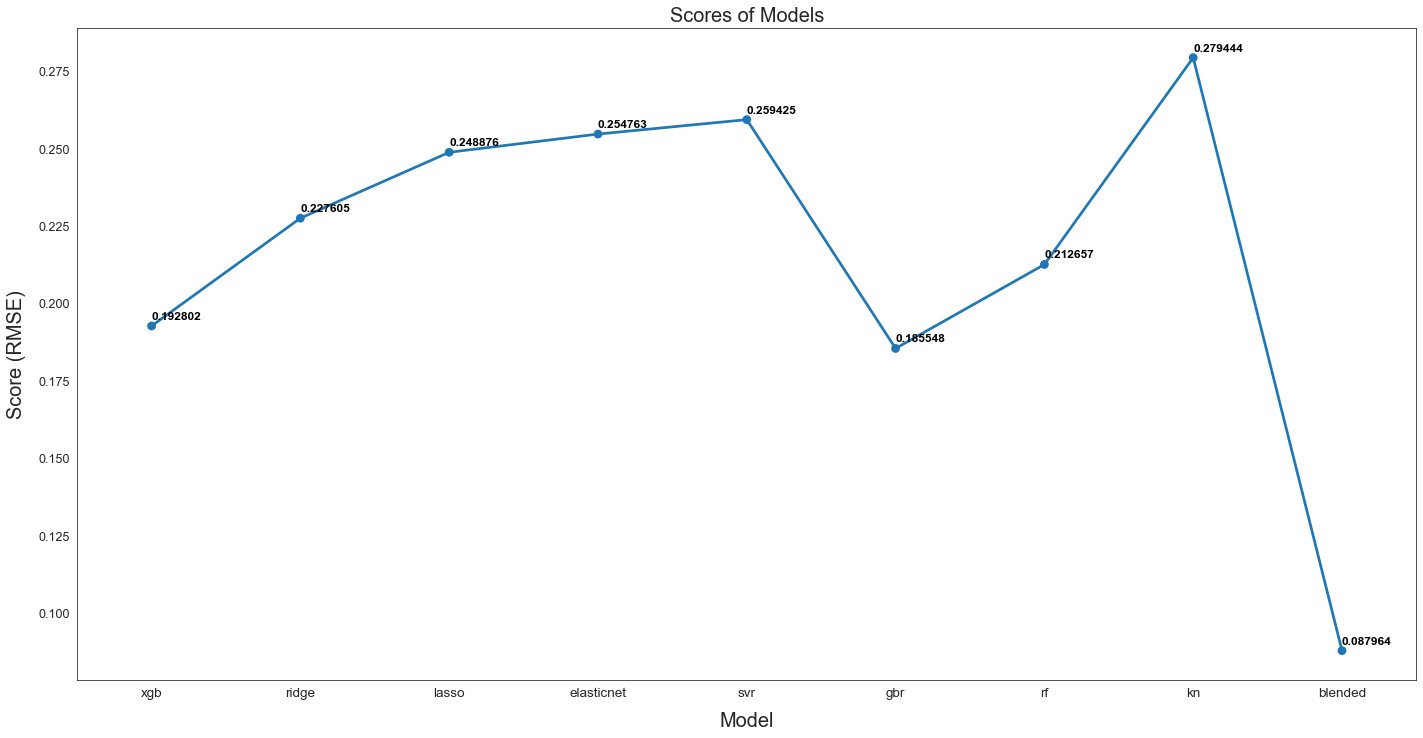

In [99]:
#Plot the predictions for each model
sns.set_style("white")
fig = plt.figure(figsize=(24, 12))

ax = sns.pointplot(x=list(scores.keys()), y=[score for score, _ in scores.values()], markers=['o'], linestyles=['-'])
for i, score in enumerate(scores.values()):
    ax.text(i, score[0] + 0.002, '{:.6f}'.format(score[0]), horizontalalignment='left', size='large', color='black', weight='semibold')

plt.ylabel('Score (RMSE)', size=20, labelpad=12.5)
plt.xlabel('Model', size=20, labelpad=12.5)
plt.tick_params(axis='x', labelsize=13.5)
plt.tick_params(axis='y', labelsize=12.5)

plt.title('Scores of Models', size=20)

plt.show()

In [100]:
predicted_prices = blended_predictions(test)
print(predicted_prices)

[7.2639864  7.1498839  6.25075645 6.77254682 7.31128266 7.21647068
 6.5837576  6.05106496 7.14477562 5.86349825 7.66180347 6.5672287
 7.3768051  6.50634005 7.57187734 6.94152767 7.1419006  6.88962931
 6.62572395 7.60988502 7.65398384 6.52537104 7.16977232 6.37474159
 6.93158145 6.83528326 6.79086617 6.57755831 7.37026088 7.02755769
 6.12687361 7.4564175  7.4417507  6.84318186 6.92850816 6.60648817
 6.54137543 6.2600437  7.08762617 5.58020282 7.55193237 6.24971736
 6.46724708 7.62975635 6.36665156 6.99745909 7.45060195 5.55943356
 6.82489187 7.31192567 7.32780971 6.24961189 6.64013218 7.15601463
 6.30096955 6.92042219 5.55943356 6.84882466 6.83053178 6.77254682
 7.40165225 6.75965592 6.08564357 6.52842787 5.69107171 7.61028403
 6.32893631 6.77141894 6.96758359 7.87960126 8.0772602  6.88086929
 6.27503286 6.65952069 5.81490481 6.05980987 6.64097009 7.4047352
 7.16168111 7.37088622 7.05721031 6.45274587 6.0088102  6.53635467
 5.7086696  7.35849311 6.31712087 7.9693496  6.95387977 6.762166

In [101]:
np.floor(np.expm1(blended_predictions(test)))

array([1426., 1272.,  517.,  872., 1496., 1360.,  722.,  423., 1266.,
        350., 2124.,  710., 1597.,  668., 1941., 1033., 1262.,  981.,
        753., 2017., 2108.,  681., 1298.,  585., 1023.,  929.,  888.,
        717., 1587., 1126.,  457., 1729., 1704.,  936., 1019.,  738.,
        692.,  522., 1196.,  264., 1903.,  516.,  642., 2057.,  581.,
       1092., 1719.,  258.,  919., 1497., 1521.,  516.,  764., 1280.,
        544., 1011.,  258.,  941.,  924.,  872., 1637.,  861.,  438.,
        683.,  295., 2017.,  559.,  871., 1060., 2641., 3219.,  972.,
        530.,  779.,  334.,  427.,  764., 1642., 1288., 1588., 1160.,
        633.,  405.,  688.,  300., 1568.,  552., 2889., 1046.,  863.,
       1564., 3436.,  882.,  769., 1075.,  430., 1087.,  731.,  651.,
       1066.,  337.,  497.,  639., 2011.,  928.,  668., 1315.,  586.,
       1143.,  431., 1550., 1219., 1006., 2654.,  305., 2157., 1400.,
       1753.,  889.,  758., 4948., 1021.,  795., 1303.,  905.,  466.,
       1301.,  616.,

In [102]:
submission = np.floor(np.expm1(blended_predictions(test)))

In [103]:
MK = pd.DataFrame({'price': submission})

In [104]:
MK.to_csv('김민구_2차.csv', index=False)